In [5]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [6]:
# df = pd.read_csv("./Donnees/donnees_consommation.csv")
df = pd.read_csv("./Donnees/donnees_con.csv")

In [7]:
df.rename(columns={"Age ": "Age", "Appareil ": "Appareil", "Temps_Réseau": "Temps_Reseau", "Plateforme_Préférée": "Plateforme_Preferee"}, inplace=True)
df.drop(columns={"Horodateur"}, inplace=True)
df["Age"] = df["Age"].astype("string")
df["Temps_Reseau"] = df["Temps_Reseau"].astype("string")
df["Temps_Streaming"] = df["Temps_Streaming"].astype("string")
df["Temps_Jeux"] = df["Temps_Jeux"].astype("string")

In [8]:
pattern = r'\d+h\s-\s\d+h'  # 9h - 10h
print(df[~df["Temps_Reseau"].str.contains(pattern, regex=True)]["Temps_Reseau"].count())
print(df[~df["Temps_Streaming"].str.contains(pattern, regex=True)]["Temps_Streaming"].count())
print(df[~df["Temps_Jeux"].str.contains(pattern, regex=True)]["Temps_Jeux"].count())

pattern = r'\d+\s-\s\d+\sans'   # 10 - 17 ans
print(df[~df["Age"].str.contains(pattern, regex=True)]["Age"].count())

0
0
0
0


In [ ]:
from functions import temps_moyen
df["Temps_Reseau"] = df["Temps_Reseau"].apply(temps_moyen)
df["Temps_Streaming"] = df["Temps_Streaming"].apply(temps_moyen)
df["Temps_Jeux"] = df["Temps_Jeux"].apply(temps_moyen)

df["Age"] = df['Age'].str.replace(' ans', '')
df.head(2)

mask = df["Sexe"] == 'Masculin'
df["Sexe"].loc[mask] = 'M'
mask = df["Sexe"] == 'Feminin'
df["Sexe"].loc[mask] = 'F'

df.head()

In [10]:
# print(df.columns)
print(df.dtypes)

Sexe                           object
Age                    string[python]
Temps_Reseau                  float64
Temps_Streaming               float64
Temps_Jeux                    float64
Plateforme_Preferee            object
Appareil                       object
dtype: object


## Temps passe sur les reseaux sociaux

#### Par tranche d'age

##### Definition des tranches d'age

In [11]:
_10_17 = df['Age'] == '10 - 16'
_18_24 = df['Age'] == '18 - 24'
_25_34 = df['Age'] == '25 - 34'
_35_44 = df['Age'] == '35 - 44'
_45_54 = df['Age'] == '45 - 54'
_55_xx = df['Age'] == '55 - et plus'

In [12]:
# 18 a 24 ans
print("Temps Reseaux: ", end='')
print(round(df[_18_24]["Temps_Reseau"].mean(), 1))
print("Temps Streaming: ", end='')
print(round(df[_18_24]["Temps_Streaming"].mean(), 1))
print("Temps Jeux: ", end='')
print(round(df[_18_24]["Temps_Jeux"].mean(), 1))



Temps Reseaux: 6.7
Temps Streaming: 3.6
Temps Jeux: 2.9


##### Par genre

In [13]:
print(df[df["Sexe"] == 'M']["Temps_Reseau"].mean())
print(df[df["Sexe"] == 'F']["Temps_Reseau"].mean())
print()
print(df[df["Sexe"] == 'M']["Temps_Streaming"].mean())
print(df[df["Sexe"] == 'F']["Temps_Streaming"].mean())
print()
print(df[df["Sexe"] == 'M']["Temps_Jeux"].mean())
print(df[df["Sexe"] == 'F']["Temps_Jeux"].mean())

7.071428571428571
7.0

2.642857142857143
4.5

2.2142857142857144
3.5


In [14]:
nbr_hommes = df[df["Sexe"] == 'M']["Sexe"].count()
nbr_femmes = df[df["Sexe"] == 'F']["Sexe"].count()

print("Nbr Hommes: ", nbr_hommes)
print("Nbr Femmes: ", nbr_femmes)

nbr_hommes - nbr_femmes

Nbr Hommes:  7
Nbr Femmes:  10


np.int64(-3)

#### Histogramme représentatif du temps passé sur les réseaux sociaux

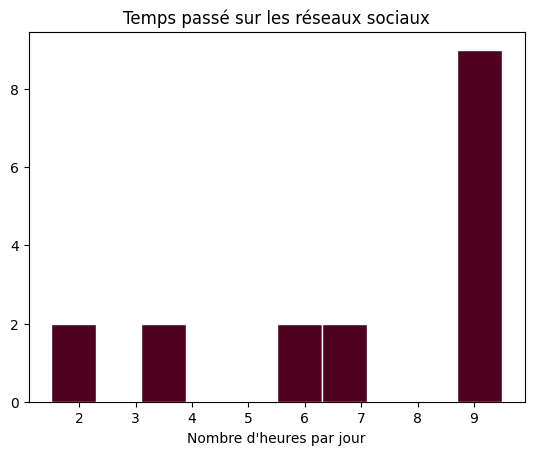

In [15]:
plt.hist(df["Temps_Reseau"], color="#500120", edgecolor= 'white')
plt.xlabel(xlabel="Nombre d'heures par jour")
plt.title("Temps passé sur les réseaux sociaux")
plt.show()

#### Diagramme en barres des plateformes les plus utilisées

In [16]:
utilisation_plateforme =  df.groupby("Plateforme_Preferee", as_index=False)["Sexe"].count()
utilisation_plateforme.rename(columns={"Sexe": "Nombre"}, inplace=True)

top_plateforme = utilisation_plateforme.sort_values("Nombre", ascending=False).head(10)
utilisation_plateforme.sort_values("Nombre", ascending=False).head(10)

,Plateforme_Preferee,Nombre
2,TikTok,10
3,WhatsApp,4
1,Instagram,2
0,Facebook,1


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_14484\1873949332.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x, rotation=90, ha='right')


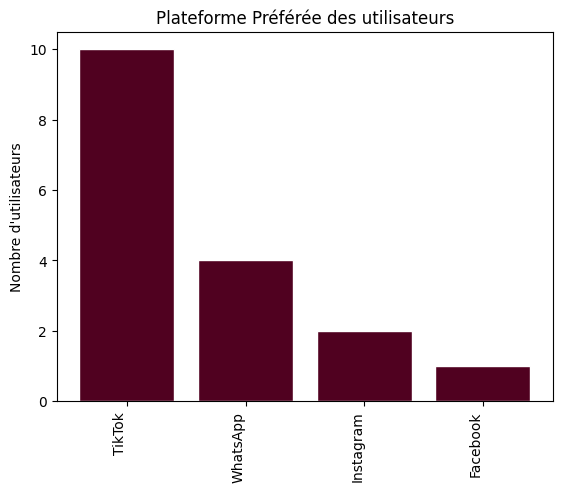

In [20]:
x = top_plateforme["Plateforme_Preferee"]
y = top_plateforme["Nombre"]

fig, ax = plt.subplots()
ax.bar(x, y, color="#500120", edgecolor='white')
ax.set_xticklabels(x, rotation=90, ha='right')
ax.set_xticks(x)
ax.set_ylabel("Nombre d'utilisateurs")
ax.set_title("Plateforme Préférée des utilisateurs")
plt.show()

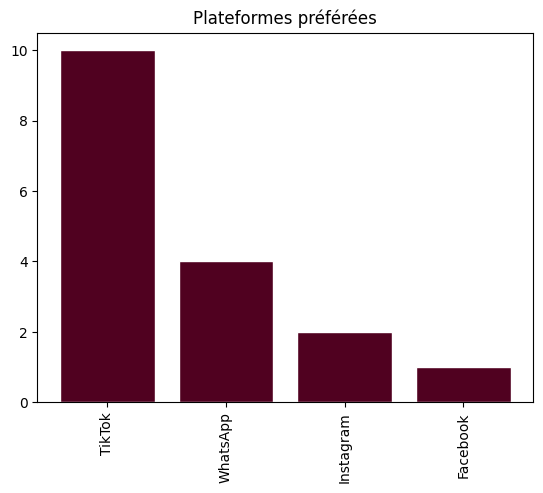

In [ ]:
x = top_plateforme["Plateforme_Preferee"]
y = top_plateforme["Nombre"]
plt.bar(x, y, color= "#500120", edgecolor="white")

plt.xticks(rotation = 90)
plt.title("Plateformes préférées")
plt.show()

#### Répartition des types d'appareils utilisés

In [ ]:
appareils_utilises = df.groupby("Appareil", as_index=False)["Sexe"].count()
appareils_utilises.rename(columns={"Sexe": "Nombre"}, inplace=True)
appareils_utilises

,Appareil,Nombre
0,Smartphone,15
1,Tablette,2


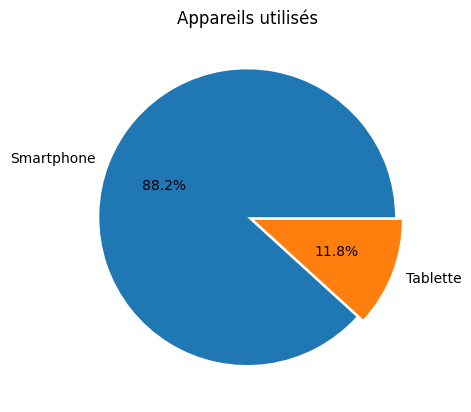

In [ ]:
sections = appareils_utilises['Nombre']
names = appareils_utilises["Appareil"]
plt.pie(sections, labels=names, autopct="%1.1f%%", explode=(0, 0.05))
plt.title("Appareils utilisés")
plt.show()

#### Bonus

##### Platformes les plus utilisees par sexe

In [ ]:
df["Plateforme_Preferee"].unique()

array(['Instagram', 'TikTok', 'Facebook', 'WhatsApp'], dtype=object)

In [ ]:
# Hommes
print("Nombre d'hommes: ", df[df['Sexe'] == 'M']['Sexe'].count())
plateformes_homme = df[df["Sexe"] == 'M'].groupby('Plateforme_Preferee', as_index=False)['Sexe'].count()
plateformes_homme.rename(columns={"Sexe": "Nombre"}, inplace=True)
plateformes_homme.sort_values("Nombre", ascending=False, inplace=True)
plateformes_homme.head(10)

Nombre d'hommes:  7


,Plateforme_Preferee,Nombre
1,TikTok,3
2,WhatsApp,3
0,Instagram,1


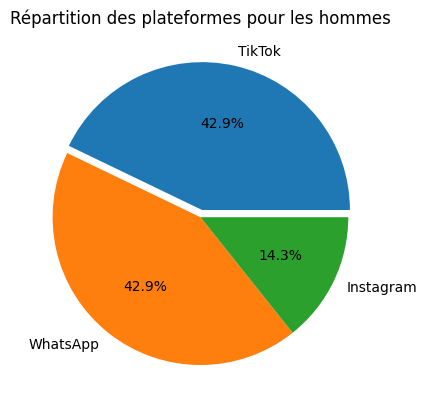

In [ ]:
sections = plateformes_homme['Nombre']
names = plateformes_homme['Plateforme_Preferee']
plt.pie(sections, labels=names, autopct="%1.1f%%", explode=(0.05, 0, 0))
plt.title("Répartition des plateformes pour les hommes")
plt.show()

In [ ]:
# Femmes
print("Nombre de femmes: ", df[df['Sexe'] == 'F']['Sexe'].count())
plateformes_femme = df[df["Sexe"] == 'F'].groupby('Plateforme_Preferee', as_index=False)['Sexe'].count()
plateformes_femme.rename(columns={'Sexe': "Nombre"}, inplace=True)
plateformes_femme.sort_values("Nombre", ascending=False, inplace=True)
plateformes_femme.head(10)

Nombre de femmes:  10


,Plateforme_Preferee,Nombre
2,TikTok,7
0,Facebook,1
1,Instagram,1
3,WhatsApp,1


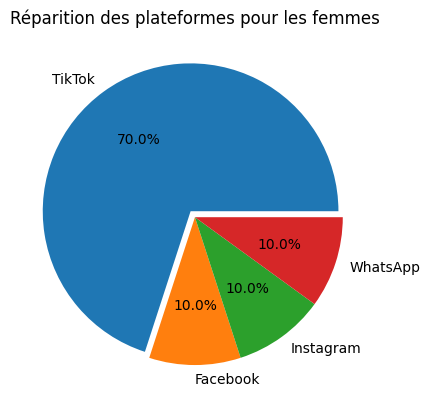

In [ ]:
sections = plateformes_femme["Nombre"]
names = plateformes_femme["Plateforme_Preferee"]
plt.pie(sections, labels=names, autopct="%1.1f%%", explode=(0.05, 0, 0, 0))
plt.title("Réparition des plateformes pour les femmes")
plt.show()